# Creación del modelo

In [257]:
# importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
#Se leen los datos una vez limpiados
#Por favor cambiar la ruta por la ruta absoluta correspondiente a su equipo, gracias. 
path = 'C:/Users/sebas/Escritorio/Analitica/analiticaComputacionalProyecto1/data/cleanData.csv'
data = pd.read_csv(path,index_col=0)
#Revisamos el tamaño de los datos y su resumen
print(data.shape)
data.head()

(1197, 23)


,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,productivity_indicator
date,,,,,,,,,,,,,,,,,,,,,
1/1/2015,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,...,0,0,0,0,0,0,1,0,0,0.140725
1/1/2015,0,1,0.75,3.94,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,1,0,0,0.136500
1/1/2015,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,1,0,0,0.000570
1/1/2015,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,1,0,0,0.000570
1/1/2015,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,...,0,0,0,0,0,0,1,0,0,0.000382


In [259]:
#COMPORTAMIENTO DE LAS VARIABLES
data.describe()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,productivity_indicator
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,...,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.577277,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,...,0.175439,0.207185,0.036759,0.166249,0.156224,0.169591,0.166249,0.167920,0.173768,0.005459
std,0.494199,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,...,0.380501,0.405458,0.188247,0.372460,0.363219,0.375430,0.372460,0.373951,0.379068,0.160082
min,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.561958
25%,0.000000,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009556
50%,1.000000,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000505
75%,1.000000,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099111
max,1.000000,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.644375


## ¿Por qué usar modelo de regresión aqui ?

Para esta oportunidad se escogió un modelo de regresión por varias razones; en primera instancia fue por la simplicidad del problema, aunque este no es trivial es un problema de relativa baja dimensionalidad, lo que se acopla bien a una regresión en este caso lineal. Otra razón de peso para usar una regresion fue la cantidad de datos disponibles, pues se tiene una cantidad de datos limitada hace mas viable entrenar satisfactoriamente un modelo de regresion sobre un modelo mas robusto que requiere un volumen de datos mas extenso como las redes neuronales.Por último , en cuanto a la interpretabilidad del caso. Usando un modelo de regresion se puede evidenciar de manera transparente, como influyen los datos y con que peso al modelo dejando ver la significancia implícita del modelo, esto es de mayor valor comparado con una red neuronal debido al publico objetivo para el que se diseñó esta solución. Pues se espera una solucion simple , transparente, de facil interpretación y uso. 

## Creacion del modelo Lineal

In [261]:
#se intenta mediante sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [262]:
# Eleccion de variables de interes
# Elegimos todas las variables para despues ir afinando el modelo basado en la significancia del mismo.
features = ['department','team','smv','over_time','incentive','actual_productivity','idle_time','idle_men','no_of_style_change','no_of_workers','quarter_Quarter1','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday']
x = data[features]
x = x.reset_index(drop=True)
print(data.shape)
x.head()

(1197, 23)


,department,team,smv,over_time,incentive,actual_productivity,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,8,26.16,7080,98,0.940725,0.0,0,0,59.0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,3.94,960,0,0.886500,0.0,0,0,8.0,...,0,0,0,0,0,0,0,1,0,0
2,1,11,11.41,3660,50,0.800570,0.0,0,0,30.5,...,0,0,0,0,0,0,0,1,0,0
3,1,12,11.41,3660,50,0.800570,0.0,0,0,30.5,...,0,0,0,0,0,0,0,1,0,0
4,1,6,25.90,1920,50,0.800382,0.0,0,0,56.0,...,0,0,0,0,0,0,0,1,0,0


### Definimos la variable de respuesta

In [263]:
y = data['targeted_productivity']
y = y.reset_index(drop=True)
print(y.shape)
y.head()

(1197,)


0    0.80
1    0.75
2    0.80
3    0.80
4    0.80
Name: targeted_productivity, dtype: float64

In [264]:
#Normaliza con standardScaler que resta la media y divide sobre la desviación
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [265]:
#Separacion entre datos de train y test

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(957, 21)
(957,)
(240, 21)
(240,)


In [266]:
#Utilizando statsmodel
import statsmodels.api as sm
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

# imprimir coeficientes
intercept=linreg.intercept_
# coeficientes con nombre de las características
coef = list(zip(features, linreg.coef_))
# agregar constante explícitamente
X_train = sm.add_constant(X_train)
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     targeted_productivity   R-squared:                       0.260
Model:                               OLS   Adj. R-squared:                  0.245
Method:                    Least Squares   F-statistic:                     17.32
Date:                   Tue, 12 Mar 2024   Prob (F-statistic):           2.92e-49
Time:                           19:37:58   Log-Likelihood:                 1025.8
No. Observations:                    957   AIC:                            -2012.
Df Residuals:                        937   BIC:                            -1914.
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

In [267]:
model1.pvalues

const                  0.000000e+00
department             6.051311e-01
team                   1.257144e-03
smv                    1.285414e-02
over_time              4.256401e-02
incentive              5.283514e-01
actual_productivity    5.160515e-47
idle_time              5.046558e-02
idle_men               5.243830e-02
no_of_style_change     4.031718e-06
no_of_workers          1.408357e-01
quarter_Quarter1       2.359185e-01
quarter_Quarter2       6.017684e-01
quarter_Quarter3       8.430666e-01
quarter_Quarter4       7.689041e-01
quarter_Quarter5       2.540393e-02
day_Monday             8.809908e-01
day_Saturday           8.041136e-01
day_Sunday             7.563735e-01
day_Thursday           8.644879e-01
day_Tuesday            1.960516e-01
day_Wednesday          4.737306e-01
dtype: float64

#### Como se puede apreciar el modelo no es muy bueno prediciendo , vamos a eliminar las variables menos significativas para ajustar el modelo . Esto se realizó iteración por iteración pero a manera de presentación se les expone de aqui en adelante las nuevas variables . la elección de la significancia de cada variable al modelo se realizó basado en el valor P.

In [268]:
#features.remove('quarterEncoded')
features.remove('idle_time')
features.remove('quarter_Quarter1')
features.remove('quarter_Quarter2')
features.remove('quarter_Quarter3')
features.remove('quarter_Quarter4')
features.remove('quarter_Quarter5')
features.remove('day_Wednesday')
features.remove('day_Monday')
features.remove('day_Tuesday')
features.remove('day_Sunday')
features.remove('day_Saturday')
features.remove('day_Thursday')
features.remove('department')
features.remove('over_time')
features.remove('incentive')
features.remove('idle_men')
features.remove('no_of_style_change')     
x = data[features]
x = x.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
intercept=linreg.intercept_
coef = list(zip(features, linreg.coef_))
# agregar constante explícitamente
X_train = sm.add_constant(X_train)
# regresión numero 2 usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     targeted_productivity   R-squared:                       0.230
Model:                               OLS   Adj. R-squared:                  0.226
Method:                    Least Squares   F-statistic:                     70.98
Date:                   Tue, 12 Mar 2024   Prob (F-statistic):           1.23e-52
Time:                           19:37:58   Log-Likelihood:                 1006.7
No. Observations:                    957   AIC:                            -2003.
Df Residuals:                        952   BIC:                            -1979.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

Despues de refinar el modelo , estas son las variables que se tienen en cuenta para su construcción con su respectivo valor P para evaluar significancia:
En cuanto al analisis del modelo, podemos ver que no es un modelo muy bueno debido a que presenta un $r^{2}$ de 0.23 que es muy lejano del valor target de 1 y quiere decir que el modelo no es capaz de explicar una gran parte de la variabilidad de los datos. Adicionalmanet por el F estadistico vemos que globalmente las variables que se contemplan son significativas para el modelo , conclusion a la que llegamos tambien con el p valor. Por ultimo , en cuanto a los coeficientes de omnibus  y Durbin-Watson , nos indica que el modelo no cumple supuestos normales y que tiene probablemente autocorrelación en los residuos.

In [269]:
model2.pvalues

const                  8.030172e-172
team                    2.281200e-04
smv                     1.441034e-02
actual_productivity     1.571470e-53
no_of_workers           1.555080e-03
dtype: float64

### Usamos el modelo para predecir los datos de validacion

In [270]:
y_pred = linreg.predict(X_test)
y_pred

array([0.80214518, 0.73838815, 0.61617207, 0.69960981, 0.73817929,
       0.77804932, 0.7588428 , 0.69939464, 0.74199397, 0.77317176,
       0.61232796, 0.75884634, 0.77549914, 0.75163673, 0.77354663,
       0.65557976, 0.68781425, 0.725864  , 0.76587038, 0.67499372,
       0.66813229, 0.75336732, 0.67009414, 0.67385151, 0.71641413,
       0.63492097, 0.7833166 , 0.75708038, 0.76587038, 0.70816143,
       0.77830089, 0.68207913, 0.7765821 , 0.7092717 , 0.76280316,
       0.65811215, 0.76800715, 0.65023533, 0.69952111, 0.73287136,
       0.74828329, 0.75150671, 0.7253687 , 0.72368333, 0.70438533,
       0.74266875, 0.80331296, 0.72553295, 0.74098976, 0.74673542,
       0.80344912, 0.7041838 , 0.72275158, 0.72817051, 0.76446848,
       0.75875418, 0.62028748, 0.7442431 , 0.72468814, 0.72098816,
       0.74891264, 0.70073791, 0.73695798, 0.61480466, 0.79061156,
       0.74893264, 0.76587038, 0.78734272, 0.71158435, 0.65055551,
       0.7033837 , 0.70388655, 0.80006241, 0.7311948 , 0.75824

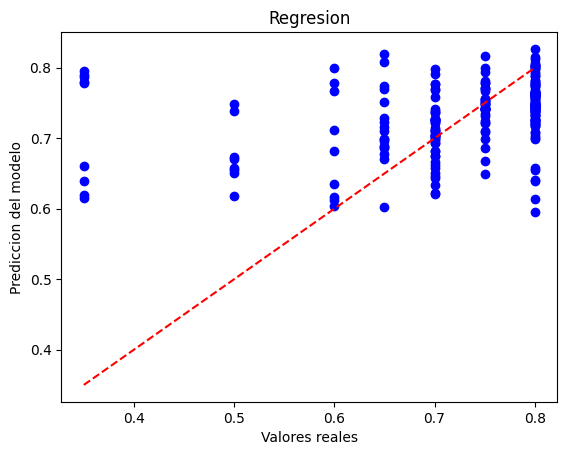

In [271]:
# Hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Línea de referencia y=x
plt.xlabel('Valores reales')
plt.ylabel('Prediccion del modelo')
plt.title('Regresion')
plt.show()

En esta grafica podemos ver la poca exactitud del modelo para predecir los datos , pues lo ideal sería que los scatter points se situaran sobre la linea punteada de la regresion o al menos tuvieran esa tendencia para decir que la regresion es muy buena. No obstante, lo que ocurre es que la capacidad de predicción de la regresión es baja y los valores no se asemejan. Esto se puede solucionar incluyendo mas variables significativas al modelo, aumentando el numero y calidad de los datos 

### Evaluamos las métricas del modelo

In [272]:
#Importacion de clases para las métricas de evaluacion
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [273]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

# Calcular el coeficiente de determinación (R²)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.06299508748085243
MSE:  0.00985773941589663
RMSE:  0.09928614916440576


Aqui podemos ver las métricas de algunas funciones de pérdida aplicadas a la regresion fabricada. pues es interesante discutir que aunque el ejuste no es muy grande , los errores medidos por las métricas son relativamente pequeños a priori de la comparación. 

### Metricas con validacion cruzada

In [274]:
#Evaluacion del modelo con validacion cruzada
#ToDo
#Evaluar con diferentes métricas en scoring( Preguntar a juanfer)
scores = cross_val_score(linreg, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[0.00715937 0.00930575 0.00953239 0.00702698 0.0076471 ]


In [275]:
# calcular RMSE
#ToDo
# Ademas de esto analizar mas funciones de perdida

rmse_scores = np.sqrt(mse_scores)
print("El error calculado por RMSE es {} ".format(rmse_scores))
# RMSE promedio a través de todos los grupos
print("El RMSE promedio es {} ".format(rmse_scores.mean()))

El error calculado por RMSE es [0.08461305 0.0964663  0.09763395 0.08382709 0.08744771] 
El RMSE promedio es 0.08999762046128645 


### Diagrama de influencia

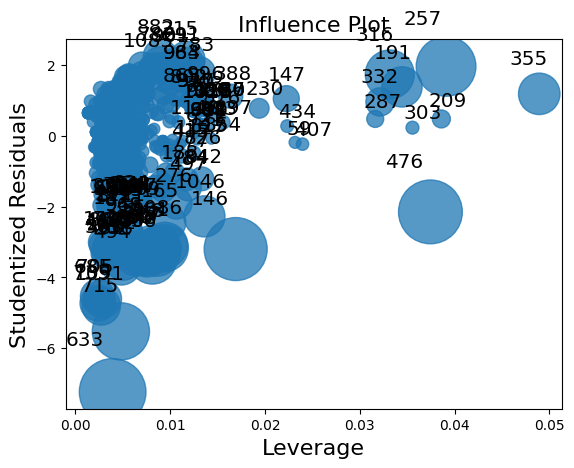

In [279]:
#Creacion de influence plot
fig = sm.graphics.influence_plot(model2, criterion="cooks")

En este influence plot podemos evidenciar la influencia de algunas observaciones ubicadas en la parte superior izquierda que se encuentran lejos de los chunks mayoritarios. Esto puede darse como respuesta a la remanencia de los outliers en la implementación del modelo. Adicionalmente podemos discutir que la desviación de los puntos sobre la regresion es mas negativa que positiva, en cuanto a la palanca o Leverage vemos que hay un grupo de gran significancia en la parte media del diagrama que junto con el tamaño de los circulos indica una gran siginificancia de estas observaciones respecto al modelo. Como acción correctiva y trabajo futuro puede ser hacer una limpieza de outliers y volver a generar la regresion. 
 